**The goal of this challenge is to build a machine learning model to predict the sales of video game.**




DataSet Info :

Attribute Information:
Rank , Name , Platform , Year , Genre , Publisher , NA_Sales , EU_Sales , JP_Sales , Other_Sales ,Global_Sales

In [ ]:
#Loading libraries
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split

**Read dataset and basic details of dataset**

View and Analyse basic details of the DataSet.

In [ ]:
df=pd.read_csv('/content/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Data Preprocessing :**

Improving Readability , Consistency and Accuracy of the given data

In [ ]:
# Drop Name as it is not required in the dataset for prediction.
df = df.drop(['Name'],axis=1)

In [ ]:
df.drop(['Name'],axis=1)

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


**The iloc property gets, or sets, the value(s) of the specified indexes.**

In [ ]:
df.iloc[16597]

,16597
Rank,16600
Platform,GBA
Year,2003.0
Genre,Platform
Publisher,Wanadoo
NA_Sales,0.01
EU_Sales,0.0
JP_Sales,0.0
Other_Sales,0.0
Global_Sales,0.01


**Descriptive Analysis i.e. Variations ,Range , Measure of Positions and Central Tendencies of the Dataset**

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Checking NA Values in the DataSet AND Dropping them**

In [ ]:
#Checking Nan Values
df.isna().sum()

,0
Rank,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
#Dropping Nan Values in the DataSet
df.dropna(inplace=True)
df.isna().sum()

,0
Rank,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [ ]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Platform = le.fit_transform(df.Platform)
df.Genre = le.fit_transform(df.Genre)
df.Publisher = le.fit_transform(df.Publisher)
df['Platform'].unique()
df['Genre'].unique()
df['Publisher'].unique()

array([359, 323, 493, 455,  21, 524,  66, 138, 445, 465,  53,   6,  85,
       177, 275, 457, 464, 288, 540, 547, 527, 137, 426, 543, 144, 347,
       385, 214, 487, 164,  17, 292, 126, 296,  91, 424, 281,  40, 325,
       253, 120,  10, 343, 521, 391, 308, 237, 499, 532,  13, 330, 241,
       528, 462, 531,  23,  63, 109, 378, 425, 537, 219, 198, 199, 550,
       206, 101, 224,  94, 430,  55, 485,  12, 565,  18, 459,   4, 419,
       348, 160,  30,  71, 460, 303, 372, 564, 413,  88, 142, 472,  97,
       434, 490,  27, 176, 322, 400, 450, 511, 441, 273, 182, 508, 299,
       191, 334, 398,  84, 495, 104, 436, 414, 574, 420, 525, 443, 246,
       341,  87, 463,   2,  58, 223, 367, 314, 365,  67, 513, 461, 256,
       362, 277, 415, 233, 506, 170, 432, 318, 305, 227, 433, 456, 526,
       193, 552,  61, 381, 515, 279, 232, 491, 263, 122, 146, 557, 238,
       481,  83,  44, 186, 324, 255,  36, 553,  22, 383, 422, 556, 184,
       544, 368, 501, 148,  60, 272, 304, 503, 213, 133, 489, 50

Histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

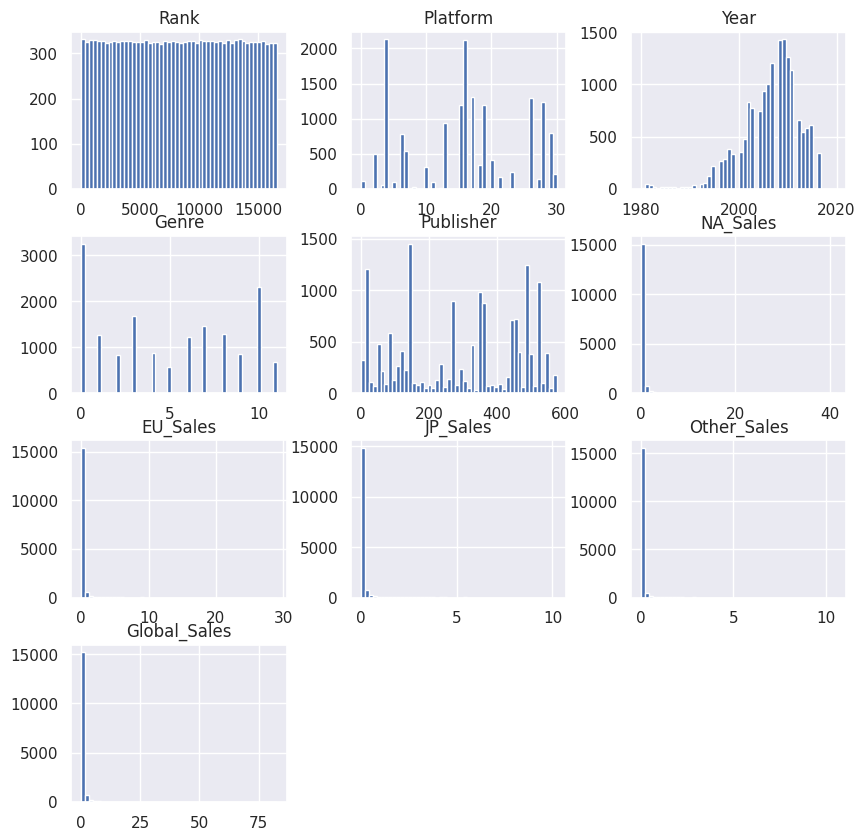

In [ ]:
df.hist(bins=50, figsize=(10,10))
plt.show()

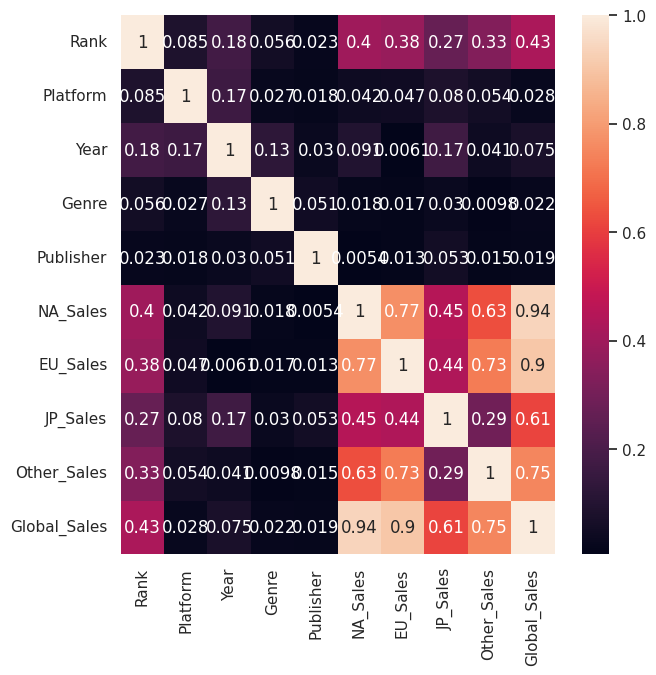

In [ ]:
#correlation plot to define relationship between two Attributes.
sns.set(rc = {'figure.figsize':(7,7)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#Printing correlation Values
corr

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.085270,0.178027,0.055518,0.023116,0.400315,0.379137,0.269323,0.332735,0.426975
Platform,0.085270,1.000000,0.167648,0.026665,0.017938,0.041976,0.046748,0.079621,0.054493,0.027929
Year,0.178027,0.167648,1.000000,0.125366,0.029802,0.091285,0.006108,0.169387,0.041128,0.074647
Genre,0.055518,0.026665,0.125366,1.000000,0.051176,0.018057,0.017005,0.030304,0.009802,0.022215
Publisher,0.023116,0.017938,0.029802,0.051176,1.000000,0.005370,0.013237,0.053019,0.014569,0.019368
NA_Sales,0.400315,0.041976,0.091285,0.018057,0.005370,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.379137,0.046748,0.006108,0.017005,0.013237,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,0.269323,0.079621,0.169387,0.030304,0.053019,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.332735,0.054493,0.041128,0.009802,0.014569,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,0.426975,0.027929,0.074647,0.022215,0.019368,0.941269,0.903264,0.612774,0.747964,1.000000


In [ ]:
# Separate target and feature column in X and y variable
target = 'Global_Sales'
X = df.drop(target,axis=1)
y = df[target]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         16291 non-null  int64  
 1   Platform     16291 non-null  int64  
 2   Year         16291 non-null  float64
 3   Genre        16291 non-null  int64  
 4   Publisher    16291 non-null  int64  
 5   NA_Sales     16291 non-null  float64
 6   EU_Sales     16291 non-null  float64
 7   JP_Sales     16291 non-null  float64
 8   Other_Sales  16291 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.2 MB


In [ ]:
y.head()

,Global_Sales
0,82.74
1,40.24
2,35.82
3,33.00
4,31.37


In [ ]:
X.shape, y.shape

((16291, 9), (16291,))

In [ ]:
y = y.values.reshape(-1,1)
X.shape, y.shape

((16291, 9), (16291, 1))

In [ ]:
# Split the X and y into X_train, X_test, y_train, y_test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#checking shape
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((13032, 9), (3259, 9), (13032, 1), (3259, 1))

In [ ]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9999933361844177

In [ ]:
#Accuracy check of trainig data
from sklearn.metrics import r2_score
#Get R2 score
model.score(X_train, y_train)

0.9999865953190419

In [ ]:
#Accuracy of test data
model.score(X_test, y_test)

0.9999933361844177

In [ ]:
# Predict the values on X_test_scaled dataset
y_predicted = model.predict(X_test)

In [ ]:
Rank = 5
Platform = 1996.0
Year = 1996.0
Genre = 7
Publisher = 359
NA_Sales_up = 3.357082
EU_Sales_up = 2.981610
JP_Sales_up = 3.196873
Other_Sales_up = 2.000000
intput_data = np.array([Rank, Platform, Year, Genre, Publisher, NA_Sales_up, EU_Sales_up, JP_Sales_up, Other_Sales_up])
intput_data = intput_data.reshape(1,-1)
prediction = model.predict(intput_data)
print(prediction)

[[11.53036796]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
